In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain
from PointProcess import PointProcessRun
from wasserstein import Cluster
from numpy import array
from scipy import linalg as la

In [2]:
interval_count = 10
PointProcess = PointProcessRun(param_location = 'Trained_Params_100_100.npz')
start_time = start_time = datetime.datetime.fromtimestamp(1465798259)
grid_loc = PointProcess.locs_for_wasserstein (start_time, interval_count, 80)

In [3]:
cluster = Cluster(grid_loc, n = 20)
cluster.randomize_centers()
lam = cluster.learn_lam(n_iter = 5, rand_centers = True)
centers= cluster.get_centers()
centers_grid_x = np.zeros(len(centers))
centers_grid_y = np.zeros(len(centers))

'''
for i in range(0, len(centers)):
    x, y = simulation.coord_to_grid(centers[i][1], centers[i][0])
    centers_grid_x[i] = x
    centers_grid_y[i] = y
centers_grid_x, centers_grid_y
'''

[1.2152656986076822, 500.0]
[1.2268054392810663, 520.0]
[1.208147176569468, 518.0]
[1.3264559878014623, 513.25]
[1.3540716684834573, 516.25]
Iteration:  3


'\nfor i in range(0, len(centers)):\n    x, y = simulation.coord_to_grid(centers[i][1], centers[i][0])\n    centers_grid_x[i] = x\n    centers_grid_y[i] = y\ncenters_grid_x, centers_grid_y\n'

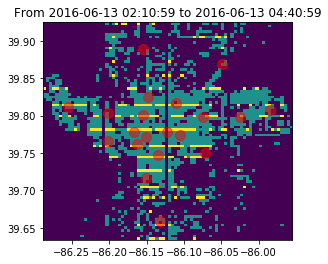

In [4]:
interval_count = 10
bincount = 80
data = grid_loc
end_time = start_time + datetime.timedelta(seconds = 15*60*interval_count)
heatmap, xedges, yedges = np.histogram2d(data[:,1], data[:,0], bins = bincount)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.title ('From {} to {}'.format(str(start_time), str(end_time)))
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.scatter(centers[:,1], centers[:,0], c = 'red', s = 100, alpha = 0.5)
plt.savefig ('wasserstein_graph.png', bbox_inches='tight')
plt.show()
plt.close()


In [5]:
data = cluster.get_data()

In [7]:
all_driving = np.empty ([0])
for x in range (10):
    point = np.random.choice(np.arange(len(data)), replace = False, size = 1)
    emergency = data [point, 0:2]
    emergency = emergency.flatten()

    #find closest center
    mindist = 9999
    for i in range (len(centers)):
        dist = la.norm (centers [i, 0:2] - emergency)
        if (dist < mindist):
            mindist = dist
            truck_point = centers [i, 0:2]
            pos = i
    centers = np.delete (centers, pos, 0)        
    #find driving distance to that point
    driving_distance = cluster.driving_distance (emergency, truck_point)
    all_driving = np.append (all_driving, driving_distance)
    
    cluster = Cluster(grid_loc, n = len(centers))
    cluster.randomize_centers()
    lam = cluster.learn_lam(n_iter = 5, rand_centers = True)
    centers = cluster.get_centers()

[1.3242138765698708, 500.0]
[1.2871196270525775, 520.0]
[1.3933578305682737, 539.0]
[1.2276213877097615, 538.0]
[1.366805231333439, 533.5]
Iteration:  4
[1.3693134043295951, 500.0]
[1.3530763866021804, 520.0]
[1.3981162286476192, 539.0]
[1.3446370726686516, 538.0]
[1.322029002851518, 533.5]
Iteration:  5
[1.4097437700476319, 500.0]
[1.4216606404590244, 520.0]
[1.4404043703809117, 519.0]
[1.3982812514679719, 522.0]
[1.3500378079651778, 541.0]
Iteration:  5
[1.3727343944324355, 500.0]
[1.4379954757701001, 520.0]
[1.3999827838411363, 518.0]
[1.4498819923708537, 516.0]
[1.4743644707088344, 517.0]
Iteration:  1
[1.5057857252158495, 500.0]
[1.5148584340656341, 520.0]
[1.477653295696311, 518.0]
[1.5060065405925023, 513.25]
[1.3984911331062093, 517.25]
Iteration:  5
[1.480355247984472, 500.0]
[1.4646331803365424, 520.0]
[1.5749791595089004, 539.0]
[1.45686046586816, 537.0]
[1.514464819558378, 532.5]
Iteration:  4
[1.5786642470786119, 500.0]
[1.5170765707575062, 520.0]
[1.5667233704262542, 539.

In [9]:
all_driving.mean()

3.9348